## Configuracion inicial

In [18]:
import nltk
nltk.download('book')
from nltk.book import *
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import plotly.express as px

[nltk_data] Downloading collection 'book'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to
[nltk_data]    |     C:\Users\david\AppData\Roaming\nltk_data...
[nltk_data]    |   Package abc is already up-to-date!
[nltk_data]    | Downloading package brown to
[nltk_data]    |     C:\Users\david\AppData\Roaming\nltk_data...
[nltk_data]    |   Package brown is already up-to-date!
[nltk_data]    | Downloading package chat80 to
[nltk_data]    |     C:\Users\david\AppData\Roaming\nltk_data...
[nltk_data]    |   Package chat80 is already up-to-date!
[nltk_data]    | Downloading package cmudict to
[nltk_data]    |     C:\Users\david\AppData\Roaming\nltk_data...
[nltk_data]    |   Package cmudict is already up-to-date!
[nltk_data]    | Downloading package conll2000 to
[nltk_data]    |     C:\Users\david\AppData\Roaming\nltk_data...
[nltk_data]    |   Package conll2000 is already up-to-date!
[nltk_data]    | Downloading package conll2002 to
[nltk_data]    |     C:\Users\david\AppData\R

In [19]:
md_bigrams = list(bigrams(text1))

In [20]:
fdist = FreqDist(md_bigrams)

In [21]:
fdist.most_common(10)

[((',', 'and'), 2607),
 (('of', 'the'), 1847),
 (("'", 's'), 1737),
 (('in', 'the'), 1120),
 ((',', 'the'), 908),
 ((';', 'and'), 853),
 (('to', 'the'), 712),
 (('.', 'But'), 596),
 ((',', 'that'), 584),
 (('.', '"'), 557)]

<Axes: xlabel='Samples', ylabel='Counts'>

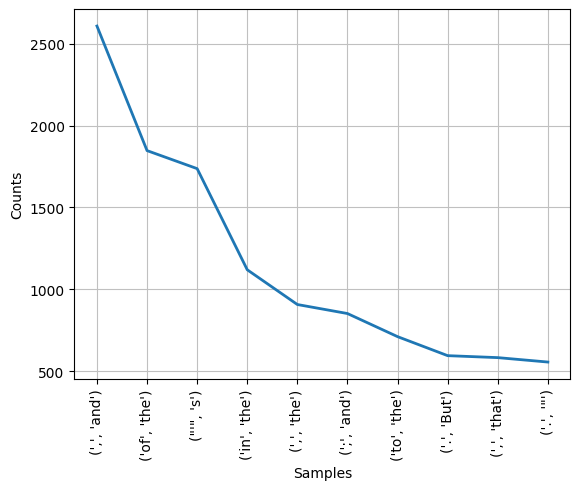

In [22]:
fdist.plot(10)

## Filtrado de bigramas

<Axes: xlabel='Samples', ylabel='Counts'>

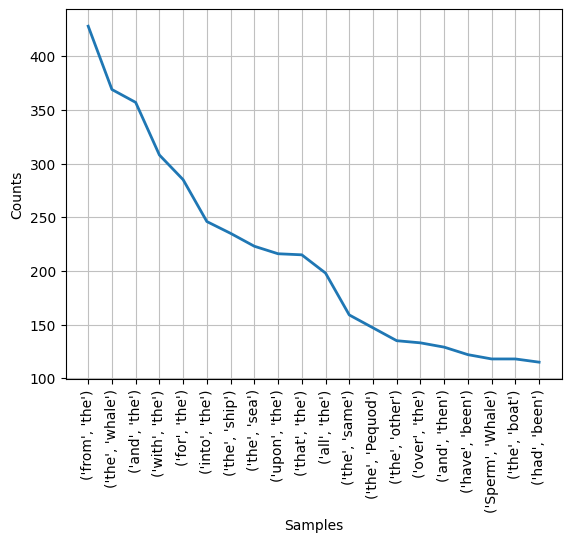

In [23]:
threshold = 2
filtered_bigrams = [bigram for bigram in md_bigrams if len(bigram[0]) > threshold and len(bigram[1]) > threshold]
filtered_dist = FreqDist(filtered_bigrams)
filtered_dist.plot(20)

## Tri-grmas

In [24]:
from nltk import ngrams
md_trigrams = list(ngrams(text1, 3))
fdist = FreqDist(md_trigrams)
fdist.most_common(10)

[((',', 'and', 'the'), 187),
 (('don', "'", 't'), 103),
 (('of', 'the', 'whale'), 101),
 ((',', 'in', 'the'), 93),
 ((',', 'then', ','), 87),
 (('whale', "'", 's'), 81),
 (('.', 'It', 'was'), 81),
 (('ship', "'", 's'), 80),
 (('the', 'Sperm', 'Whale'), 77),
 ((',', 'as', 'if'), 76)]

<Axes: xlabel='Samples', ylabel='Counts'>

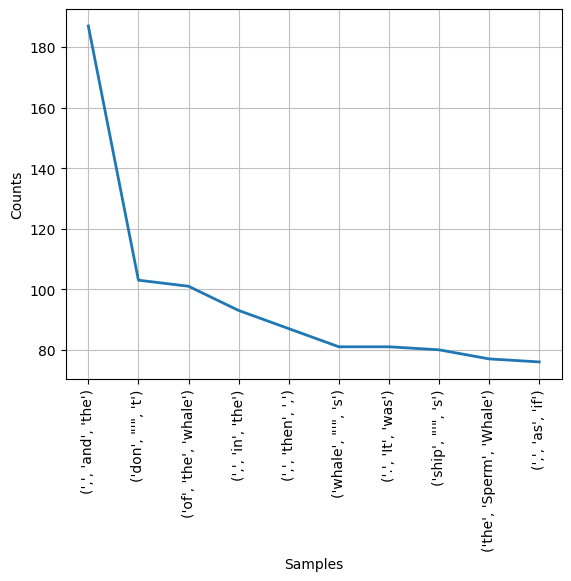

In [25]:
fdist.plot(10)

## Collocations (colocaciones)

In [26]:
md_bigrams = list(bigrams(text1))

threshold = 2
#distribution of bi-grams
filtered_bigrams = [bigram for bigram in md_bigrams if len(bigram[0])>threshold and len(bigram[1])>threshold]
filtered_bigram_dist = FreqDist(filtered_bigrams)
#distribution of words
filtered_words = [word for word in text1 if len(word)>threshold]
filtered_word_dist = FreqDist(filtered_words)

df = pd.DataFrame()
df['bi_gram'] = list(set(filtered_bigrams))
df['word_0'] = df['bi_gram'].apply(lambda x: x[0])
df['word_1'] = df['bi_gram'].apply(lambda x: x[1])
df['bi_gram_freq'] = df['bi_gram'].apply(lambda x: filtered_bigram_dist[x])
df['word_0_freq'] = df['word_0'].apply(lambda x: filtered_word_dist[x])
df['word_1_freq'] = df['word_1'].apply(lambda x: filtered_word_dist[x])
df

,bi_gram,word_0,word_1,bi_gram_freq,word_0_freq,word_1_freq
0,"(LARGE, ROLL)",LARGE,ROLL,1,2,1
1,"(purest, envoy)",purest,envoy,1,3,1
2,"(hands, they)",hands,they,1,123,586
3,"(All, Astir)",All,Astir,1,55,1
4,"(the, fury)",the,fury,2,13721,9
...,...,...,...,...,...,...
67937,"(Nantucket, irons)",Nantucket,irons,1,85,17
67938,"(little, table)",little,table,1,247,35
67939,"(recorded, history)",recorded,history,1,4,15
67940,"(twelve, rods)",twelve,rods,2,16,12


## Pointwise Mutual Information (PMI)

In [27]:
df['PMI'] = df[['bi_gram_freq', 'word_0_freq', 'word_1_freq']].apply(lambda x:np.log2(x.values[0]/(x.values[1]*x.values[2])), axis = 1)
df['log(bi_gram_freq)'] = df['bi_gram_freq'].apply(lambda x: np.log2(x))
df

,bi_gram,word_0,word_1,bi_gram_freq,word_0_freq,word_1_freq,PMI,log(bi_gram_freq)
0,"(LARGE, ROLL)",LARGE,ROLL,1,2,1,-1.000000,0.0
1,"(purest, envoy)",purest,envoy,1,3,1,-1.584963,0.0
2,"(hands, they)",hands,they,1,123,586,-16.137271,0.0
3,"(All, Astir)",All,Astir,1,55,1,-5.781360,0.0
4,"(the, fury)",the,fury,2,13721,9,-15.914023,1.0
...,...,...,...,...,...,...,...,...
67937,"(Nantucket, irons)",Nantucket,irons,1,85,17,-10.496854,0.0
67938,"(little, table)",little,table,1,247,35,-13.077650,0.0
67939,"(recorded, history)",recorded,history,1,4,15,-5.906891,0.0
67940,"(twelve, rods)",twelve,rods,2,16,12,-6.584963,1.0


In [28]:
df.sort_values(by = "PMI", ascending= False)

,bi_gram,word_0,word_1,bi_gram_freq,word_0_freq,word_1_freq,PMI,log(bi_gram_freq)
67536,"(movingly, admonish)",movingly,admonish,1,1,1,0.000000,0.0
67437,"(CONTESTED, ELECTION)",CONTESTED,ELECTION,1,1,1,0.000000,0.0
67632,"(Historically, Regarded)",Historically,Regarded,1,1,1,0.000000,0.0
7077,"(unsignifying, pettiness)",unsignifying,pettiness,1,1,1,0.000000,0.0
7062,"(MISSIONARY, JOURNAL)",MISSIONARY,JOURNAL,1,1,1,0.000000,0.0
...,...,...,...,...,...,...,...,...
43272,"(man, the)",man,the,1,508,13721,-22.732783,0.0
10502,"(some, the)",some,the,1,578,13721,-22.919024,0.0
44630,"(one, the)",one,the,1,889,13721,-23.540138,0.0
58429,"(the, not)",the,not,1,13721,1103,-23.851315,0.0


In [32]:
import nbformat
fig = px.scatter(x = df['PMI'].values, y = df['log(bi_gram_freq)'].values, color = df['PMI']+df['log(bi_gram_freq)'], 
                 size = (df['PMI']+df['log(bi_gram_freq)']).apply(lambda x: 1/(1+abs(x))).values, 
                 hover_name = df['bi_gram'].values, width = 600, height = 600, labels = {'x': 'PMI', 'y': 'Log(Bigram Frequency)'})
plt.show(fig)

## Medidas pre-construidas en NLTK

In [ ]:
from nltk.collocations import *